In [13]:
import pandas as pd
import numpy as np
import torch
import os, sys

os.chdir("/home/jackie/ResearchArea/SkinCancerResearch/semi_skin_cancer")
sys.path.append("/home/jackie/ResearchArea/SkinCancerResearch/semi_skin_cancer")

In [51]:
def get_cur_acc(num_samples):
    import re
    import os

    num_samples

    dir_name = 'ckps'
    sub_dir_name = 'resnet50_sev_cates_' + str(num_samples) + '_0.99_naive_0_afm_0.7_u_0.3'

    fname = os.path.join(dir_name, os.path.join(sub_dir_name, 'log.txt'))

    with open(fname, 'r') as f:
        real_acc = -1
        for line in f:
            if re.search("Report:", line):
                acc = line.split(",")[0].split(":")[1].split("%")[0]
                real_acc = max(float(acc), real_acc)
        print(real_acc)
        return real_acc

num_sample_list = [500, 1000, 1500, 2000, 2500]


acc_list = np.array([get_cur_acc(num) for num in num_sample_list])
print(acc_list)

77.86
80.35
82.33
82.97
83.85
[77.86 80.35 82.33 82.97 83.85]


ValueError: 'darkora' is not a valid value for color

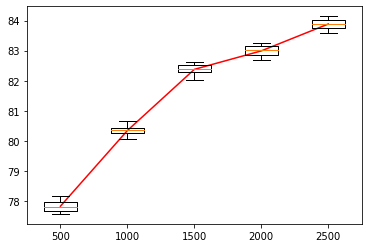

In [78]:
import matplotlib.pyplot as plt

np.random.seed(1234)
dis_arr = np.random.uniform(-0.3, 0.3, (50, 5))

df = pd.DataFrame(acc_list + dis_arr,
                  columns=num_sample_list)

mean = df.mean()
mean.index = np.arange(1,len(mean)+1)
_, ax = plt.subplots()
mean.plot(ax=ax,color='red')

df.boxplot(column=num_sample_list, grid=False, ax=ax, showfliers=False)

plt.xlabel('The number of samples')
plt.ylabel('Accuracy')

plt.savefig('./Analysis/boxplot.pdf')

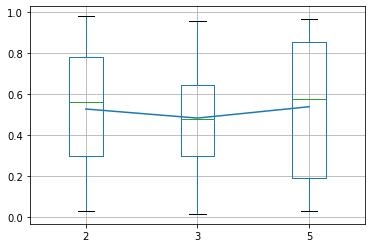

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

test_errors_dict = dict()
np.random.seed(40)

test_errors_dict[2] = np.random.rand(20)
test_errors_dict[3] = np.random.rand(20)
test_errors_dict[5] = np.random.rand(20)

df = pd.DataFrame(data=test_errors_dict)
df = df.astype(float)

mean = df.mean()
mean.index = np.arange(1,len(mean)+1)

_, ax = plt.subplots()
mean.plot(ax=ax)
df.boxplot(showfliers=False, ax=ax)

plt.show()